Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
sns.set_style("whitegrid")
plt.rc("figure",autolayout=True)
plt.rc("axes",labelweight="bold",labelsize="large",titleweight="bold",titlesize=18,titlepad=10)
plt.rc("animation",html="html5")
import warnings
warnings.filterwarnings("ignore")

Import Data

In [4]:
train_path=r"D:\Resume Projects\Forecasting Sales\train.csv"
test_path=r"D:\Resume Projects\Forecasting Sales\test.csv"

In [5]:
train_data=pd.read_csv(train_path)
test_data=pd.read_csv(test_path)

In [6]:
train_df=pd.DataFrame(train_data)
test_df=pd.DataFrame(test_data)

In [7]:
train_df.head(3)

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0


In [8]:
test_df.head(3)

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
train_df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [12]:
train_df['num_sold'].describe()

count    221259.000000
mean        752.527382
std         690.165445
min           5.000000
25%         219.000000
50%         605.000000
75%        1114.000000
max        5939.000000
Name: num_sold, dtype: float64

In [13]:
train_df['num_sold'].sum()

np.float64(166503456.0)

In [14]:
train_df.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

Important : Null and 0 are not same in data.   
0 is a value.  
Null means value doesn't exist (data not available).  

In [15]:
test_df.isnull().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

Dealing with Date

In [16]:
train_df["date"]=pd.to_datetime(train_df["date"])
test_df["date"]=pd.to_datetime(test_df["date"])

Perform Exploratory Data Analysis

In [17]:
for col in train_df.columns:
    print(col,'---->',train_df[col].nunique())

id ----> 230130
date ----> 2557
country ----> 6
store ----> 3
product ----> 5
num_sold ----> 4037


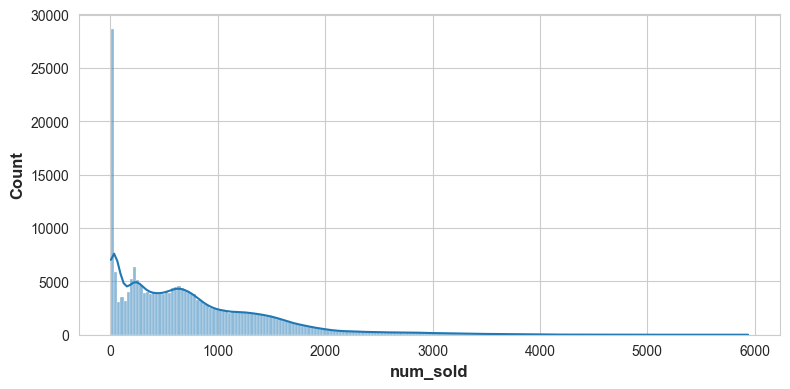

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(train_df["num_sold"], kde=True)
plt.show()

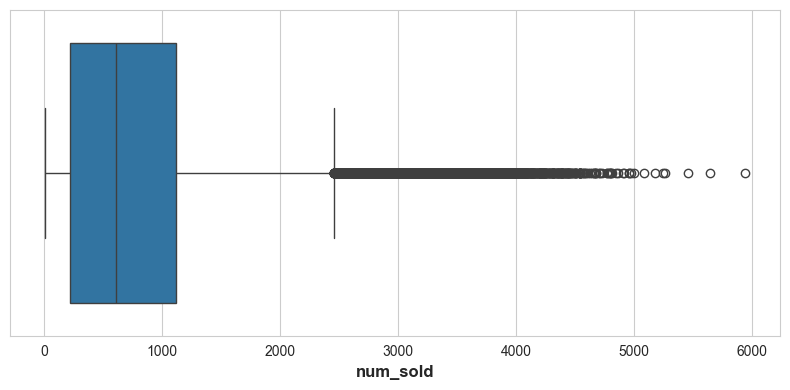

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(x=train_df["num_sold"])
plt.show()

Understanding Box Plot  
https://www.geeksforgeeks.org/box-plot/  

In [20]:
train_df["country"].value_counts() 
# Number of rows with each country

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

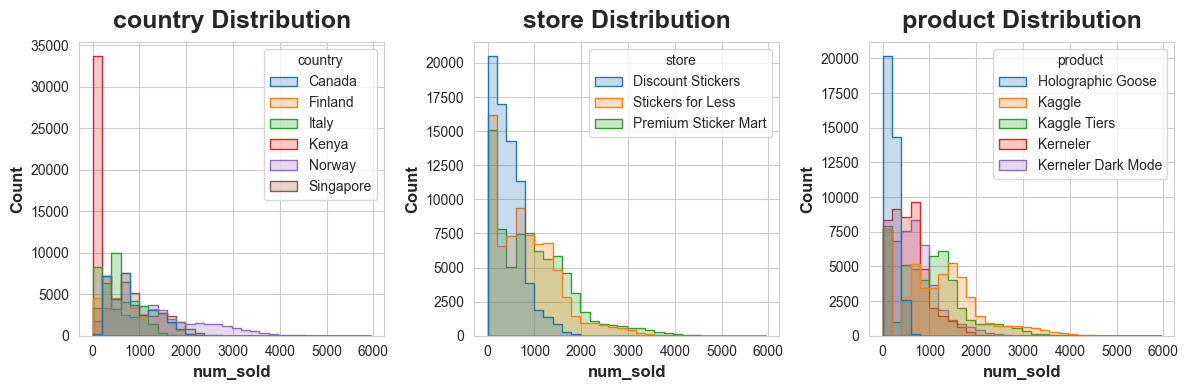

In [21]:
categorical_columns = ['country','store','product']
plt.figure(figsize=(12, 4))

for i,column in enumerate(categorical_columns, 1): # index starts at 1
    plt.subplot(1,3,i)
    sns.histplot(data = train_df, x = "num_sold", hue =column , element ='step', bins=30) # hue -> categories in each column, step for transparent bars
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

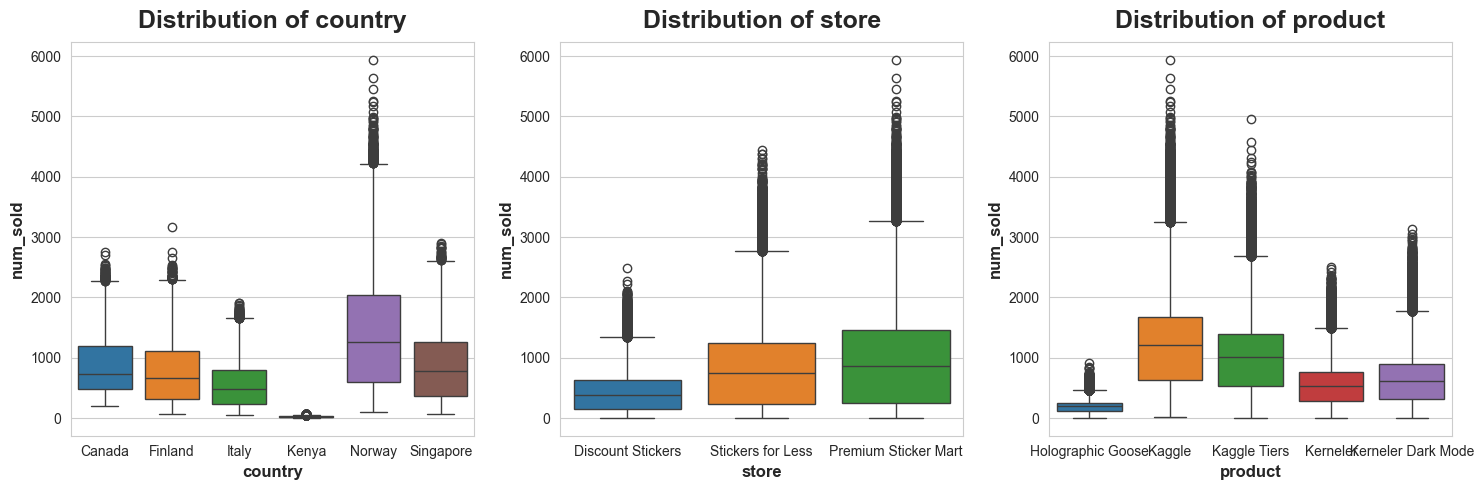

In [22]:
plt.figure(figsize=(15,5))
for i,column in enumerate(categorical_columns, 1):
    plt.subplot(1,3,i)
    sns.boxplot(y = train_df["num_sold"], x =train_df[column] ,hue =train_df[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Norway, Premium Sticker Mart, Kaggle, Kaggle Tiers are bringing majority sales.  
Majority outliers also present in them.

In [23]:
train_df.groupby('country')['num_sold'].mean()

country
Canada        840.045003
Finland       748.243306
Italy         542.241403
Kenya          20.431100
Norway       1422.560422
Singapore     863.052379
Name: num_sold, dtype: float64

In [24]:
train_df.groupby('country')['num_sold'].median()

country
Canada        731.0
Finland       665.0
Italy         480.0
Kenya          18.0
Norway       1261.0
Singapore     772.0
Name: num_sold, dtype: float64

See above Norway mean, median proves it.

In [25]:
train_df.groupby('store')['num_sold'].mean()

store
Discount Stickers       427.775887
Premium Sticker Mart    973.836240
Stickers for Less       840.046418
Name: num_sold, dtype: float64

In [26]:
train_df.groupby('store')['num_sold'].median()

store
Discount Stickers       380.0
Premium Sticker Mart    859.0
Stickers for Less       744.0
Name: num_sold, dtype: float64

In [27]:
train_df.groupby('product')['num_sold'].mean()

product
Holographic Goose      197.484363
Kaggle                1232.384587
Kaggle Tiers          1018.344110
Kerneler               556.913102
Kerneler Dark Mode     651.042021
Name: num_sold, dtype: float64

In [28]:
train_df.groupby('product')['num_sold'].median()

product
Holographic Goose      192.0
Kaggle                1215.0
Kaggle Tiers          1007.0
Kerneler               537.0
Kerneler Dark Mode     617.0
Name: num_sold, dtype: float64

Handling Missing Values

In [29]:
train_df['num_sold'] = train_df.groupby('country')['num_sold'].transform(lambda x: x.fillna(x.median()))

In [30]:
import plotnine as p9 
from plotnine import *

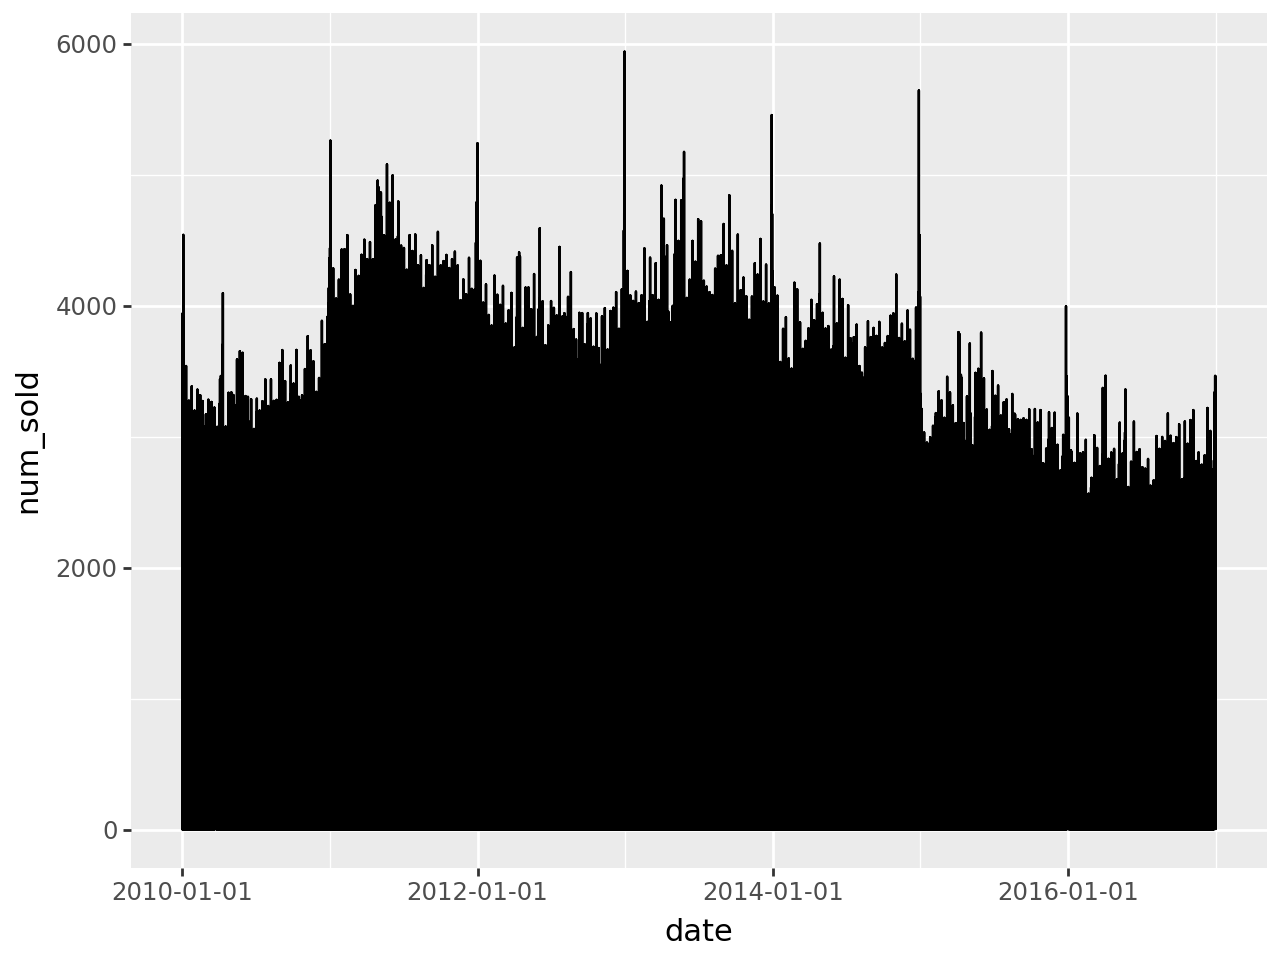

In [31]:
ggplot(train_df, aes(x='date', y='num_sold')) + geom_line()

Time Series Plot

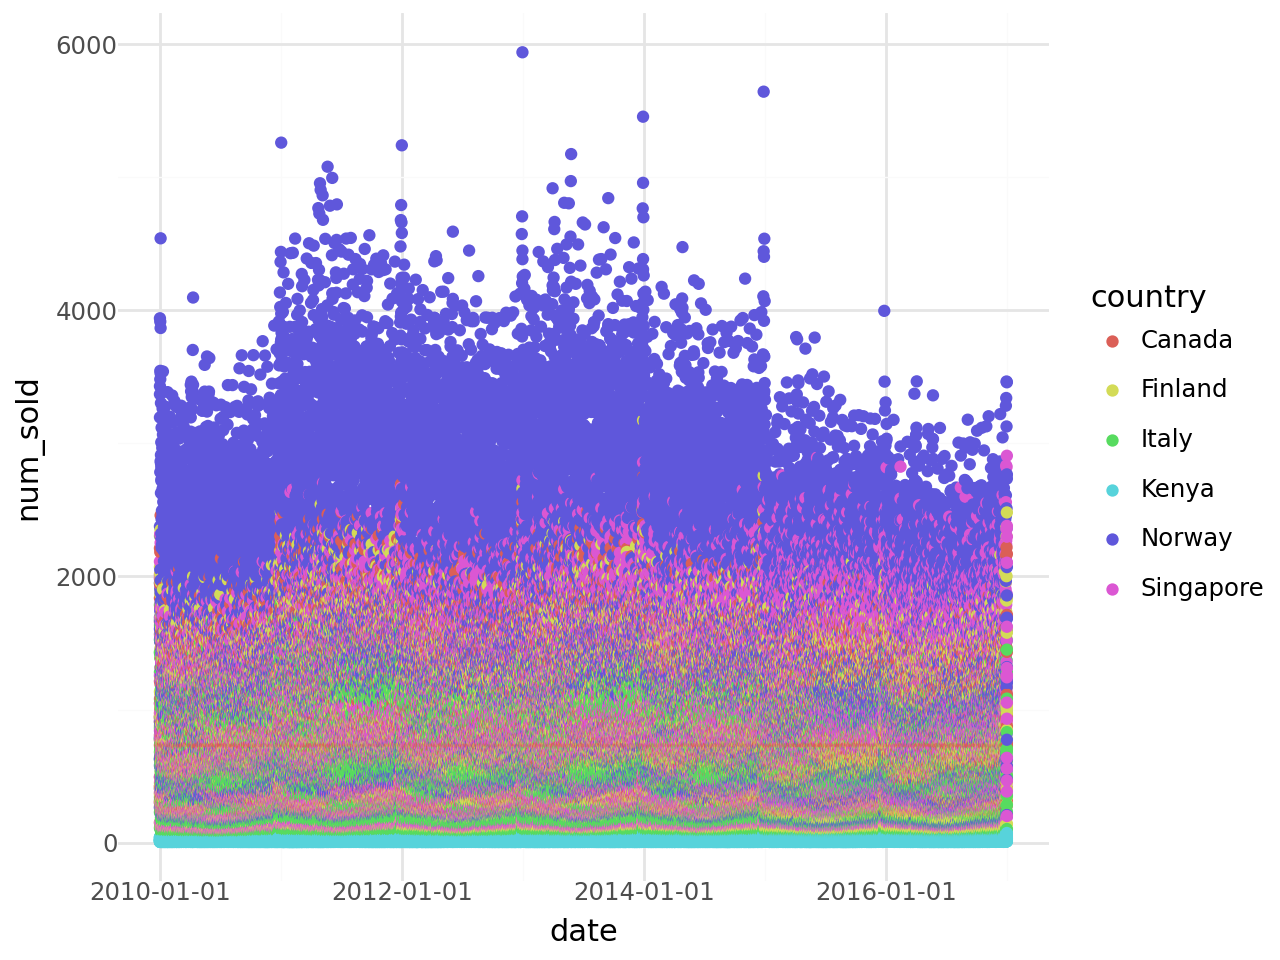

In [32]:
ggplot(train_df, aes(x='date', y='num_sold',group='country' ,color='country'))+geom_point()+ theme_minimal()

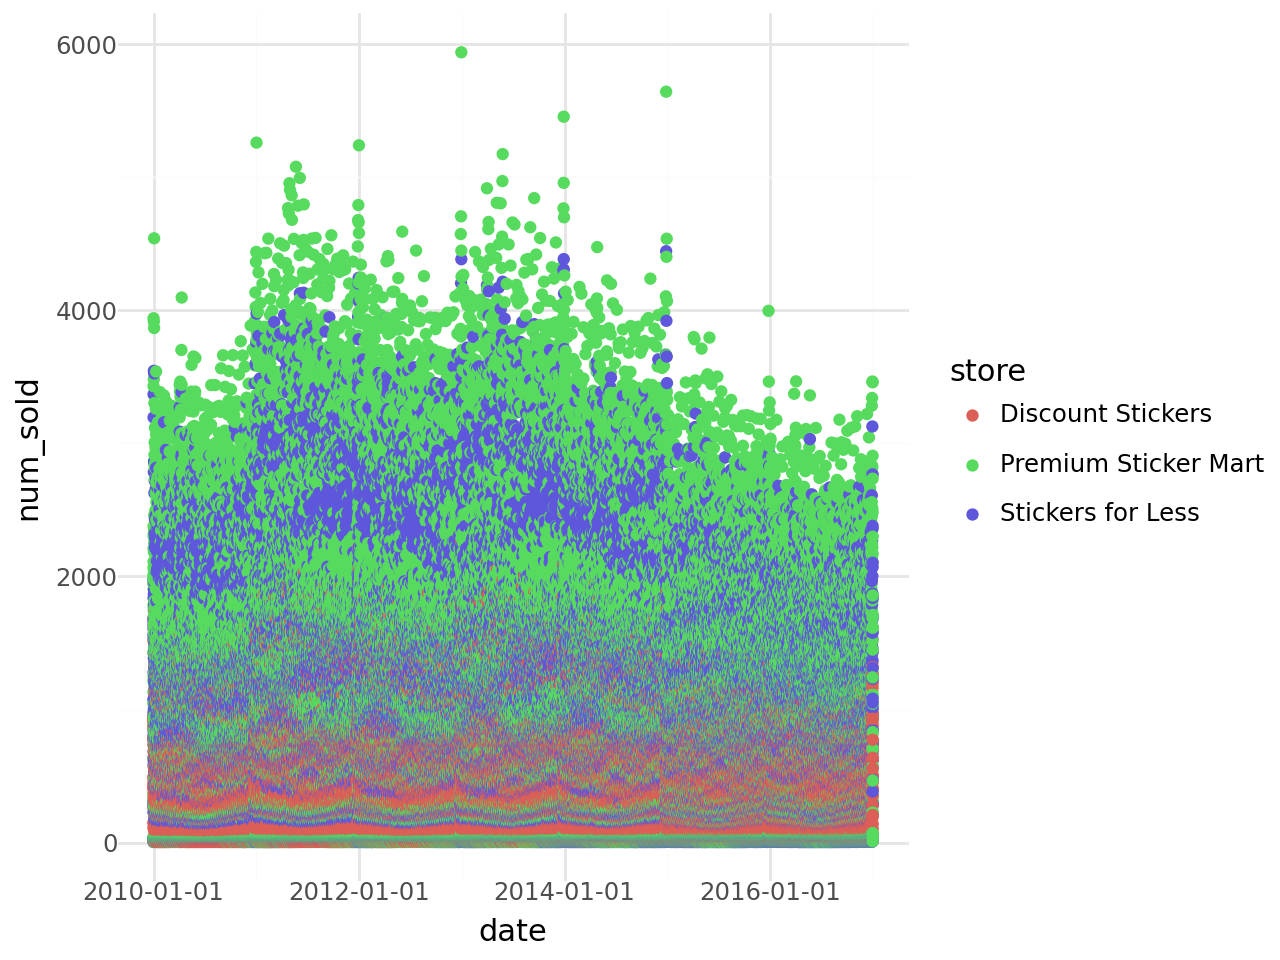

In [33]:
ggplot(train_df, aes(x='date', y='num_sold',group='store' ,color='store'))+geom_point()+ theme_minimal()

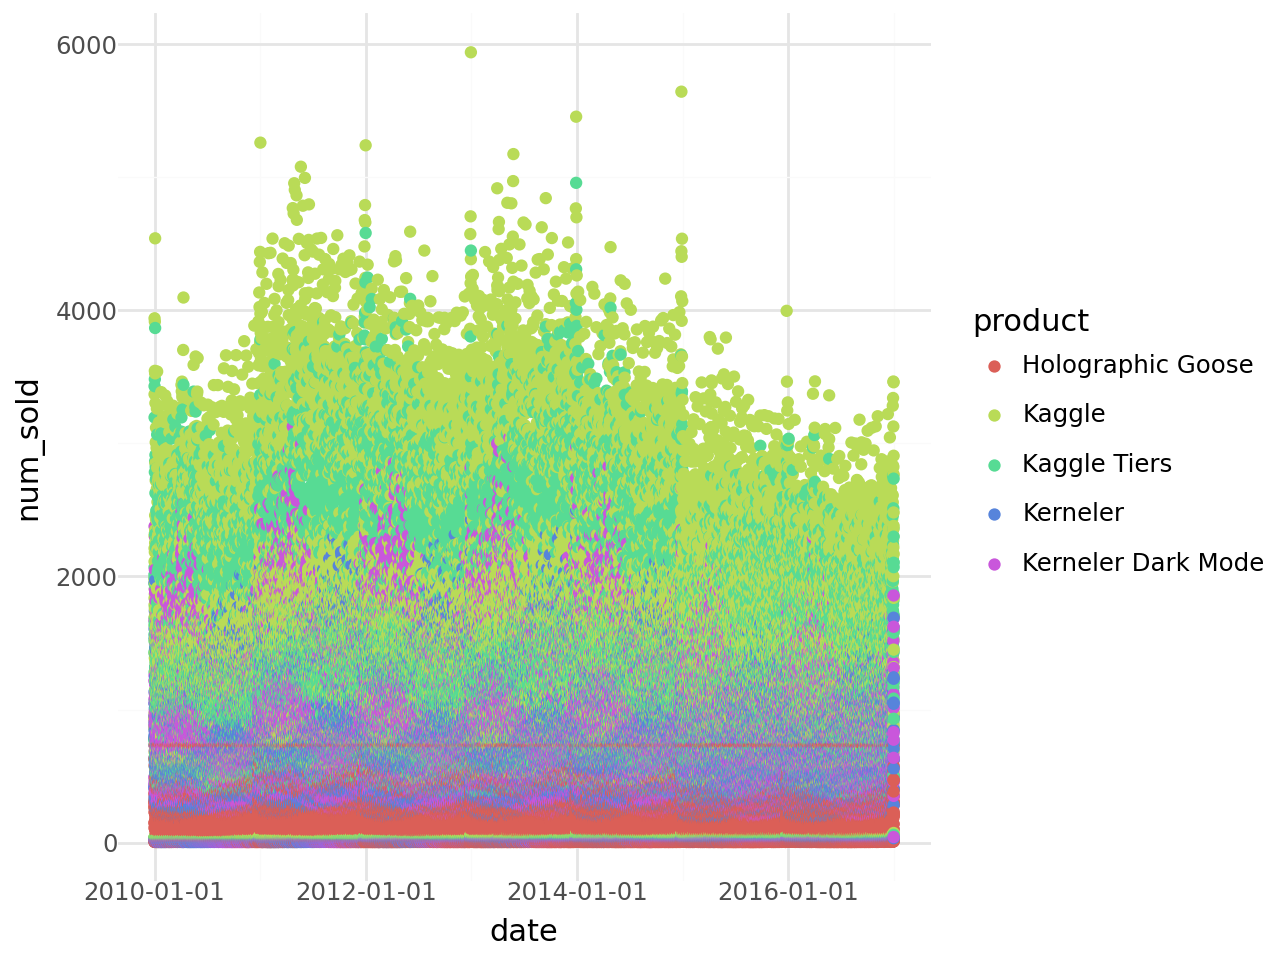

In [34]:
ggplot(train_df, aes(x='date', y='num_sold',group='product' ,color='product'))+geom_point()+ theme_minimal()

Feature engineering for date

In [35]:
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['day_of_week'] = train_df['date'].dt.dayofweek

In [36]:
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['day_of_week'] = test_df['date'].dt.dayofweek

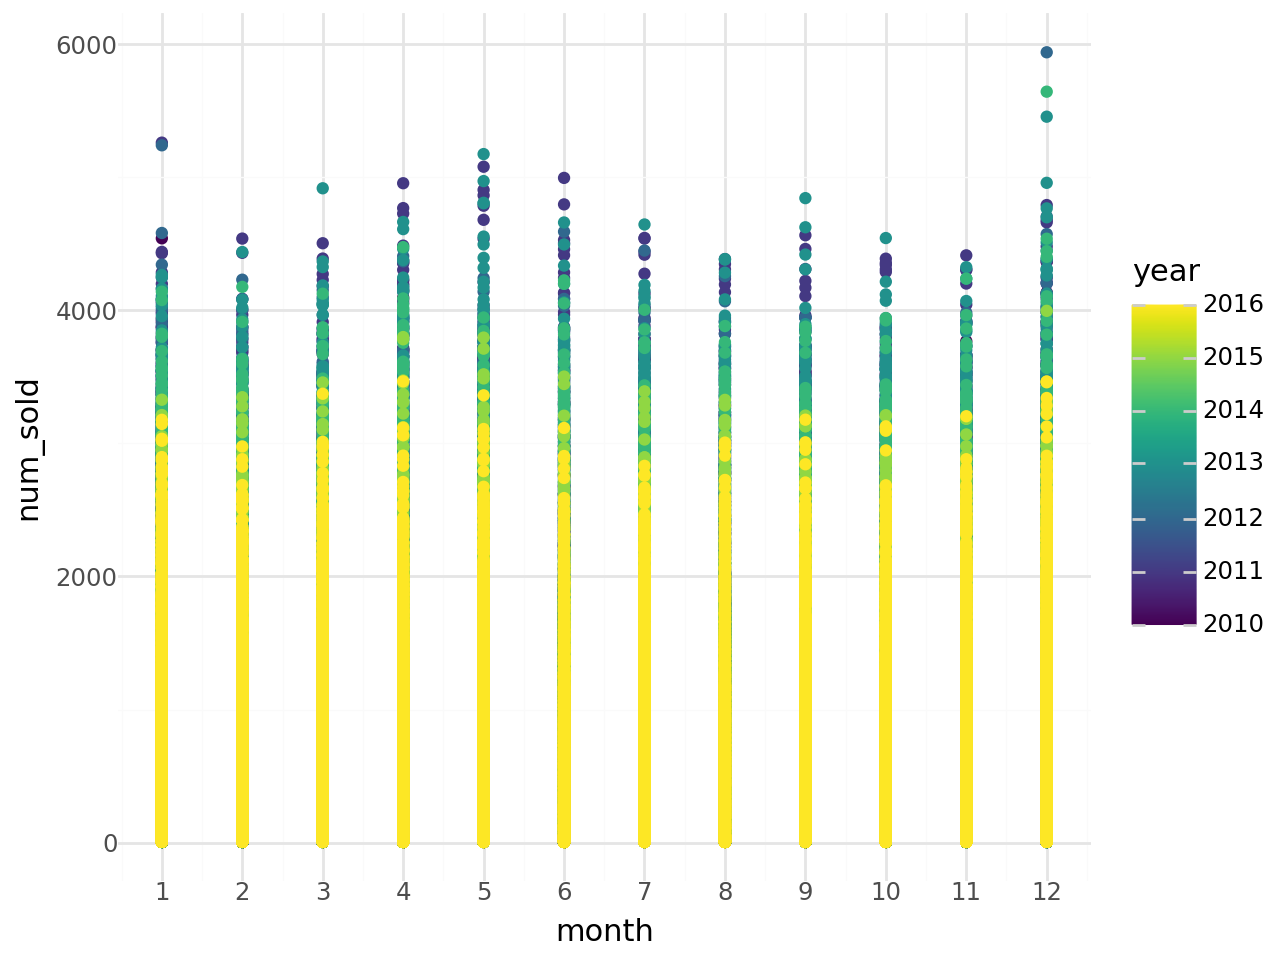

In [37]:
ggplot(train_df, aes(x='month', y='num_sold',group='year' ,color='year'))+geom_point()+scale_x_continuous(breaks=range(1, 13))+ theme_minimal() 

In [38]:
train_df.head(5)

,id,date,country,store,product,num_sold,year,month,day,day_of_week
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,731.0,2010,1,1,4
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,4
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1,4
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1,4
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1,4


Feature Engineering

In [39]:
train_df["holiday"] = 0
test_df["holiday"] = 0

In [40]:
print(train_df["country"].unique())
print(test_df["country"].unique())

['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']


In [41]:
import holidays

ca_holidays = holidays.country_holidays('CA') # Canada
fi_holidays = holidays.country_holidays('FI') # Finland
it_holidays = holidays.country_holidays('IT') # Italy
ke_holidays = holidays.country_holidays('KE') # Kenya
no_holidays = holidays.country_holidays('NO') # Norway
sg_holidays = holidays.country_holidays('SG') # Singapore

For calculating holidays of various countries.  

In [42]:
def set_holiday(row):
    VAL_HOLIDAY = 1
    if row["country"] == "Canada" and row["date"] in ca_holidays:
        row["holiday"] = VAL_HOLIDAY

    elif row["country"] == "Finland" and row["date"] in fi_holidays:
        row["holiday"] = VAL_HOLIDAY

    elif row["country"] == "Italy" and row["date"] in it_holidays:
        row["holiday"] = VAL_HOLIDAY

    elif row["country"] == "Kenya" and row["date"] in ke_holidays:
        row["holiday"] = VAL_HOLIDAY
    
    elif row["country"] == "Norway" and row["date"] in no_holidays:
        row["holiday"] = VAL_HOLIDAY

    elif row["country"] == "Singapore" and row["date"] in sg_holidays:
        row["holiday"] = VAL_HOLIDAY

    return row

In [43]:
df_train = train_df.apply(set_holiday, axis=1)
df_test = test_df.apply(set_holiday, axis=1)

In [44]:
df_train

,id,date,country,store,product,num_sold,year,month,day,day_of_week,holiday
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,731.0,2010,1,1,4,1
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,4,1
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1,4,1
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1,4,1
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,12,31,5,0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,12,31,5,0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,31,5,0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,12,31,5,0


applying one hot encoding

In [45]:
df_train_encoded = pd.get_dummies(df_train, columns=['country','store','product'])
df_test_encoded = pd.get_dummies(df_test, columns=['country','store','product'])

Sine Cosine Transformation on date features  

Sine and cosine transformations are commonly used to encode cyclical features, such as dates or times, in machine learning models. Features like months, days of the week, or hours of the day have a natural cyclical nature. For instance, the day after Sunday is Monday, and January follows December.  
Machine learning algorithms often treat numerical features as linear. However, cyclical data should account for the fact that the start and end of a cycle are connected. Sine and cosine transformations project these features into a continuous two-dimensional circular space, preserving their cyclical nature.  



In [46]:
def periodic_transform(dff,variable):
    dff[f"{variable}_SIN"] = np.sin(dff[variable] / dff[variable].max()*2*np.pi)
    dff[f"{variable}_COS"] = np.cos(dff[variable] / dff[variable].max()*2*np.pi)
    return dff

In [47]:
cyclic_col = ['month','day','day_of_week']

for col in cyclic_col:
    df_train_final = periodic_transform(df_train_encoded, col)
    df_test_final = periodic_transform(df_test_encoded, col)

In [48]:
df_train_final.columns

Index(['id', 'date', 'num_sold', 'year', 'month', 'day', 'day_of_week',
       'holiday', 'country_Canada', 'country_Finland', 'country_Italy',
       'country_Kenya', 'country_Norway', 'country_Singapore',
       'store_Discount Stickers', 'store_Premium Sticker Mart',
       'store_Stickers for Less', 'product_Holographic Goose',
       'product_Kaggle', 'product_Kaggle Tiers', 'product_Kerneler',
       'product_Kerneler Dark Mode', 'month_SIN', 'month_COS', 'day_SIN',
       'day_COS', 'day_of_week_SIN', 'day_of_week_COS'],
      dtype='object')

In [49]:
df_test_final.columns

Index(['id', 'date', 'year', 'month', 'day', 'day_of_week', 'holiday',
       'country_Canada', 'country_Finland', 'country_Italy', 'country_Kenya',
       'country_Norway', 'country_Singapore', 'store_Discount Stickers',
       'store_Premium Sticker Mart', 'store_Stickers for Less',
       'product_Holographic Goose', 'product_Kaggle', 'product_Kaggle Tiers',
       'product_Kerneler', 'product_Kerneler Dark Mode', 'month_SIN',
       'month_COS', 'day_SIN', 'day_COS', 'day_of_week_SIN',
       'day_of_week_COS'],
      dtype='object')

In [50]:
print(df_train_final.head())

   id       date  num_sold  year  month  day  day_of_week  holiday  \
0   0 2010-01-01     731.0  2010      1    1            4        1   
1   1 2010-01-01     973.0  2010      1    1            4        1   
2   2 2010-01-01     906.0  2010      1    1            4        1   
3   3 2010-01-01     423.0  2010      1    1            4        1   
4   4 2010-01-01     491.0  2010      1    1            4        1   

   country_Canada  country_Finland  ...  product_Kaggle  product_Kaggle Tiers  \
0            True            False  ...           False                 False   
1            True            False  ...            True                 False   
2            True            False  ...           False                  True   
3            True            False  ...           False                 False   
4            True            False  ...           False                 False   

   product_Kerneler  product_Kerneler Dark Mode  month_SIN  month_COS  \
0             False

Dropping unwanted columns

In [51]:
df_train_final = df_train_final.drop(['month', 'day', 'day_of_week', 'date', 'id'], axis = 1)
df_test_final = df_test_final.drop(['month', 'day', 'day_of_week', 'date', 'id'], axis = 1)

In [52]:
df_train_final.columns

Index(['num_sold', 'year', 'holiday', 'country_Canada', 'country_Finland',
       'country_Italy', 'country_Kenya', 'country_Norway', 'country_Singapore',
       'store_Discount Stickers', 'store_Premium Sticker Mart',
       'store_Stickers for Less', 'product_Holographic Goose',
       'product_Kaggle', 'product_Kaggle Tiers', 'product_Kerneler',
       'product_Kerneler Dark Mode', 'month_SIN', 'month_COS', 'day_SIN',
       'day_COS', 'day_of_week_SIN', 'day_of_week_COS'],
      dtype='object')

In [53]:
numeric_df = df_train_final.select_dtypes(include = ['number'])
corr_matrix = numeric_df.corr()

In [54]:
print(corr_matrix['num_sold'].sort_values(ascending = False).to_string())

num_sold           1.000000
day_of_week_COS    0.038840
month_SIN          0.014314
holiday            0.012204
day_COS            0.008649
day_SIN            0.002863
month_COS          0.002002
year              -0.031935
day_of_week_SIN   -0.032685


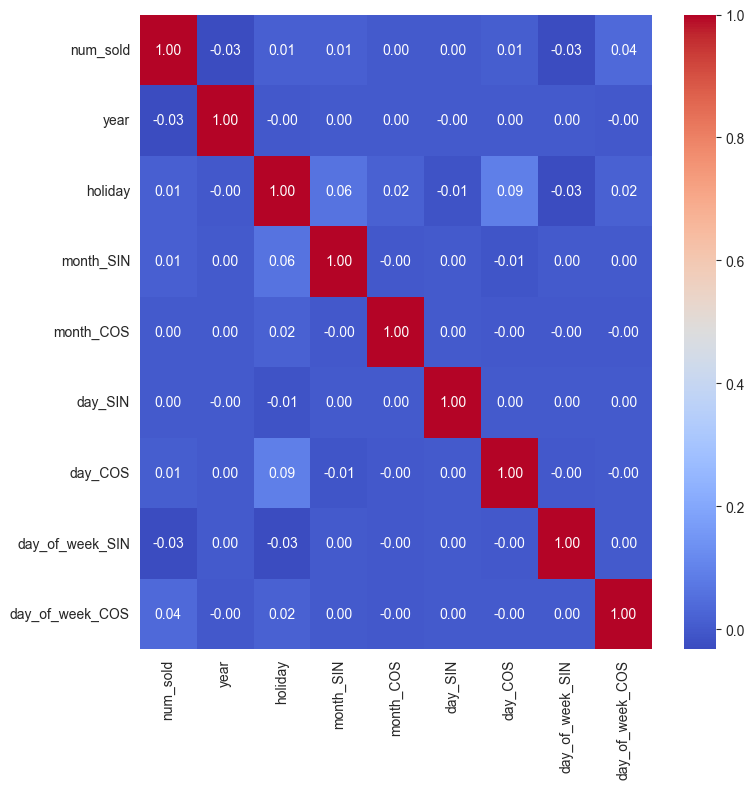

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm', fmt = ".2f")
plt.show()

In [56]:
x = df_train_final.drop(['num_sold'],axis =1)
y = df_train_final['num_sold']

Splitting data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

Applying min max scaler

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
mm = MinMaxScaler()
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

Deploying model

In [61]:
def model_acc(model):
    model.fit(x_train_scaled,y_train)
    acc = model.score(x_test_scaled,y_test)
    print(str(model)+'-->'+str(acc))

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

DecisionTreeRegressor()-->0.9551806454987966
RandomForestRegressor()-->0.9738696570463917


Evaluating model for decision tree

In [63]:
y_test_pred = dt.predict(x_test_scaled)
y_test = y_test.values.flatten()
y_test_pred = y_test_pred.flatten()
final_df1 = pd.DataFrame(np.hstack((y_test_pred[:, np.newaxis], y_test[:, np.newaxis])), columns=['Prediction', 'Real'])

In [64]:
final_df1.head(5)

,Prediction,Real
0,681.0,647.0
1,1047.0,1109.0
2,731.0,731.0
3,408.0,423.0
4,212.0,253.0


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [66]:
acc_train_dt = dt.score(x_train_scaled,y_train)
print("Model Score on Train set :",acc_train_dt)
print("Model Score on Test set :",dt.score(x_test_scaled,y_test))

Model Score on Train set : 1.0
Model Score on Test set : 0.9551806454987966


In [67]:
print(f'MAE: {mean_absolute_error(final_df1["Prediction"],final_df1["Real"])}')
print(f'MSE: {mean_squared_error(final_df1["Prediction"],final_df1["Real"])}')
print(f'RMSE: {np.sqrt(mean_squared_error(final_df1["Prediction"],final_df1["Real"]))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)}')

MAE: 78.19255036240071
MSE: 21118.58091877705
RMSE: 145.32233454901916
MAPE: 0.11236700895119649


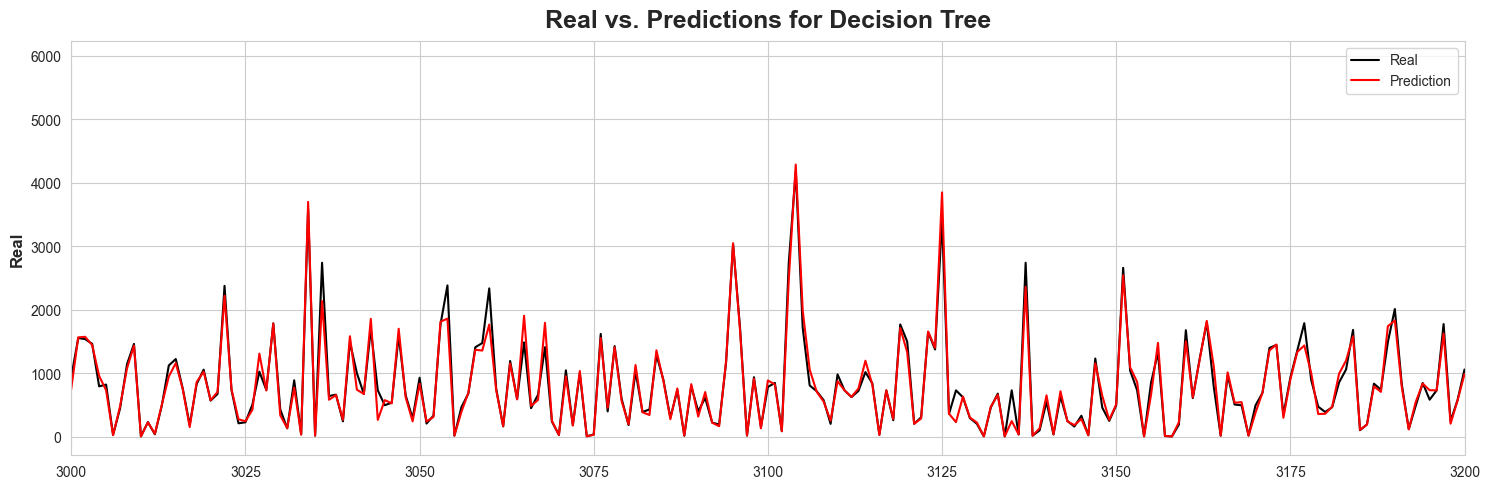

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=range(len(final_df1['Real'])) ,y=final_df1['Real'],color='black',label='Real')
sns.lineplot(x=range(len(final_df1['Prediction'])),y=final_df1['Prediction'],color='red',label='Prediction')
ax.set_xlim([3000,3200])
plt.title('Real vs. Predictions for Decision Tree')
plt.show()

Model Evaluation for Random Forest

In [69]:
y_test_pred = rf.predict(x_test_scaled)
y_test_pred = y_test_pred.flatten()
final_df2 = pd.DataFrame(np.hstack((y_test_pred[:, np.newaxis], y_test[:, np.newaxis])), columns=['Prediction', 'Real'])

In [70]:
acc_train = rf.score(x_train_scaled,y_train)
print(acc_train)

0.9964426864634944


In [71]:
print(f'MAE: {mean_absolute_error(final_df2["Prediction"],final_df2["Real"])}')
print(f'MSE: {mean_squared_error(final_df2["Prediction"],final_df2["Real"])}')
print(f'RMSE: {np.sqrt(mean_squared_error(final_df1["Prediction"],final_df1["Real"]))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)}')

MAE: 60.834046894825576
MSE: 12312.443323706395
RMSE: 145.32233454901916
MAPE: 0.0894258554654118


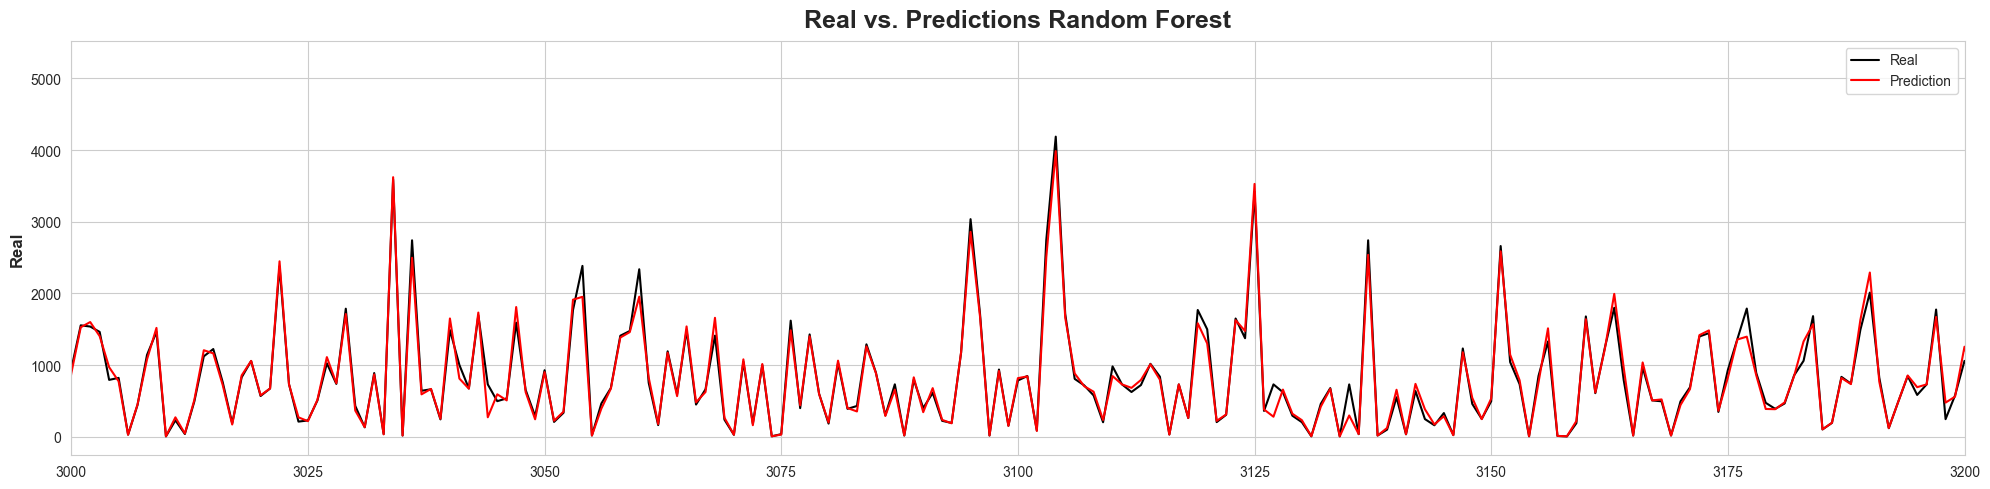

In [72]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=range(len(final_df2['Real'])) ,y=final_df2['Real'],color='black',label='Real')
sns.lineplot(x=range(len(final_df2['Prediction'])),y=final_df2['Prediction'],color='red',label='Prediction')
ax.set_xlim([3000,3200])
plt.title('Real vs. Predictions Random Forest')
plt.show()

XGBoost

In [73]:
import xgboost as xgb

In [74]:
train_data = xgb.DMatrix(x_train_scaled, label=y_train)
test_data = xgb.DMatrix(x_test_scaled, label=y_test)

In [ ]:
params = {
    'objective': 'reg:squarederror', 
    'learning_rate': 0.1, 
    'max_depth': 5,  
    'alpha': 10,  
    'n_estimators': 100  
}

In [76]:
model_xgb = xgb.train(params, train_data, num_boost_round=100)

In [77]:
y_pred = model_xgb.predict(test_data)

In [78]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')

MAE: 66.23346845574072
MSE: 11295.99141592104
RMSE: 106.28260166142454
MAPE: 0.3335770921015282


In [79]:
y_test_pred = y_pred.flatten()
final_df2 = pd.DataFrame(np.hstack((y_test_pred[:, np.newaxis], y_test[:, np.newaxis])), columns=['Prediction', 'Real'])

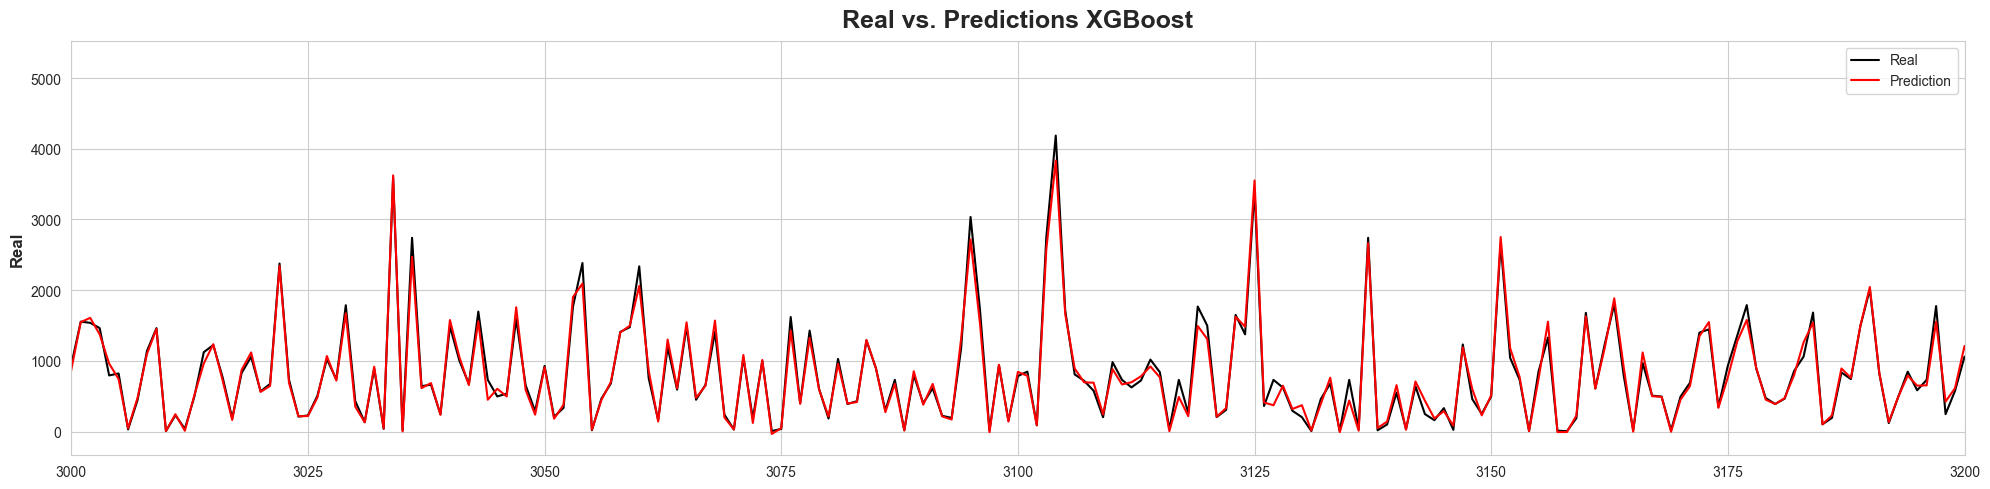

In [80]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=range(len(final_df2['Real'])) ,y=final_df2['Real'],color='black',label='Real')
sns.lineplot(x=range(len(final_df2['Prediction'])),y=final_df2['Prediction'],color='red',label='Prediction')
ax.set_xlim([3000,3200])
plt.title('Real vs. Predictions XGBoost')
plt.show()

Deploying Random Forest for test data set.  

When considering the Mean Absolute Percentage Error (MAPE) for machine learning models, the model with the lowest MAPE is considered the best. Among these models, the Random Forest model performs the best. Therefore, we can use it to predict the sticker prices of the test data.

In [81]:
y_test_pred_rf = rf.predict(df_test_final)

In [82]:
submission_df = pd.DataFrame({
    'id': df_test_encoded['id'],  # Extract 'id' column from the test DataFrame
    'Premium Amount': y_test_pred_rf  # Use the predictions from your model
})

In [83]:
submission_df

,id,Premium Amount
0,230130,731.00
1,230131,698.36
2,230132,551.28
3,230133,345.01
4,230134,403.30
...,...,...
98545,328675,289.72
98546,328676,2275.56
98547,328677,1830.18
98548,328678,1012.45


In [84]:
df = pd.DataFrame(submission_df)

file_path = "D:\Resume Projects\Forecasting Sales\submission.csv"

df.to_csv(file_path, index=False)

print(f"DataFrame has been saved to {file_path}")

DataFrame has been saved to D:\Resume Projects\Forecasting Sales\submission.csv
